In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [9]:
df = pd.read_csv('fcc-forum-pageviews.csv',index_col=0,parse_dates=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [10]:
df =df[(df['value'] < df['value'].quantile(.975)) & (df['value'] > df['value'].quantile(.025))]

In [11]:
df.count()
# df['value'].nsmallest(20)

value    1238
dtype: int64

In [12]:
def draw_line_plot():
    # Draw line plot
    fig1 = plt.figure(figsize=(16, 5))
    plt.plot(df.index, df['value'])
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.show()
    # Save image and return fig (don't change this part)
    # fig.savefig('line_plot.png')
    return fig1
# a = draw_line_plot()
# b = a.axes[0]
# b.get_title()
# b.get_ylabel()

In [13]:
df['Year'] = df.index.year
df['Months'] = df.index.strftime('%B')
df.head()

,value,Year,Months
date,,,
2016-05-19,19736,2016,May
2016-05-26,18060,2016,May
2016-05-27,19997,2016,May
2016-05-28,19044,2016,May
2016-05-29,20325,2016,May


In [14]:
df_grouped = df.groupby(['Year', 'Months'])['value'].mean().reset_index()
df_grouped.head()
# df_grouped.shape

,Year,Months,value
0,2016,August,31049.193548
1,2016,December,27832.419355
2,2016,July,24109.678571
3,2016,June,21875.105263
4,2016,May,19432.400000


In [15]:
df_pivot = df_grouped.pivot(index='Year', columns='Months', values='value')
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
df_pivot=df_pivot[month_order]

In [16]:

# df_pivot = df_pivot[month_order]
df_pivot

Months,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


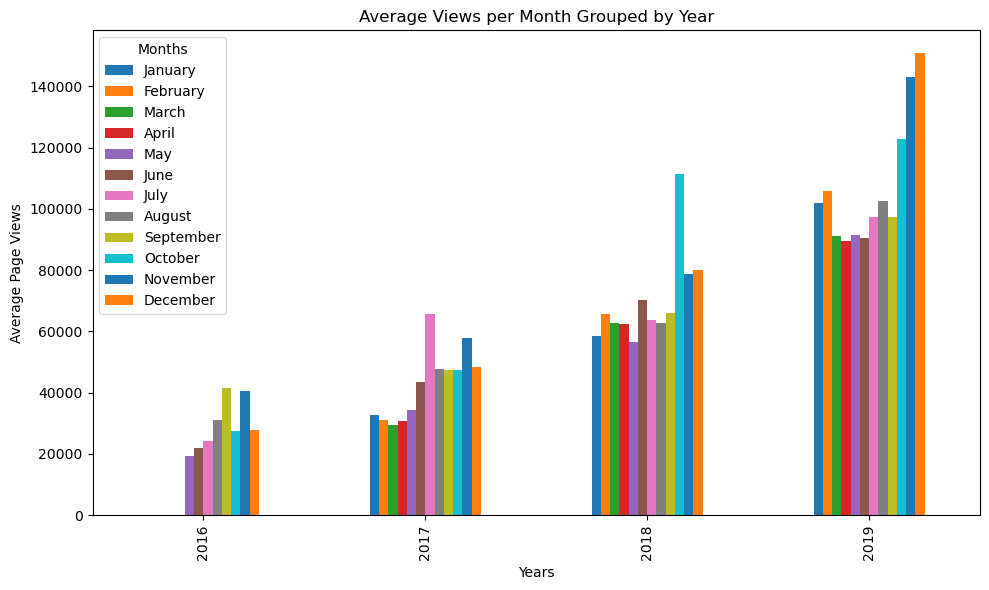

In [17]:

fig2 = plt.figure(figsize=(10, 6))
df_pivot.plot(kind='bar', ax=plt.gca(), legend=True)

plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.title('Average Views per Month Grouped by Year')

plt.tight_layout()
plt.show()

In [18]:
actual = []
axes = fig2.axes[0]
for label in axes.get_legend().get_texts():
    actual.append(label.get_text())
actual
major_t =[]
for i in axes.get_xaxis().get_majorticklabels():
    major_t.append(i.get_text())
major_t

['2016', '2017', '2018', '2019']

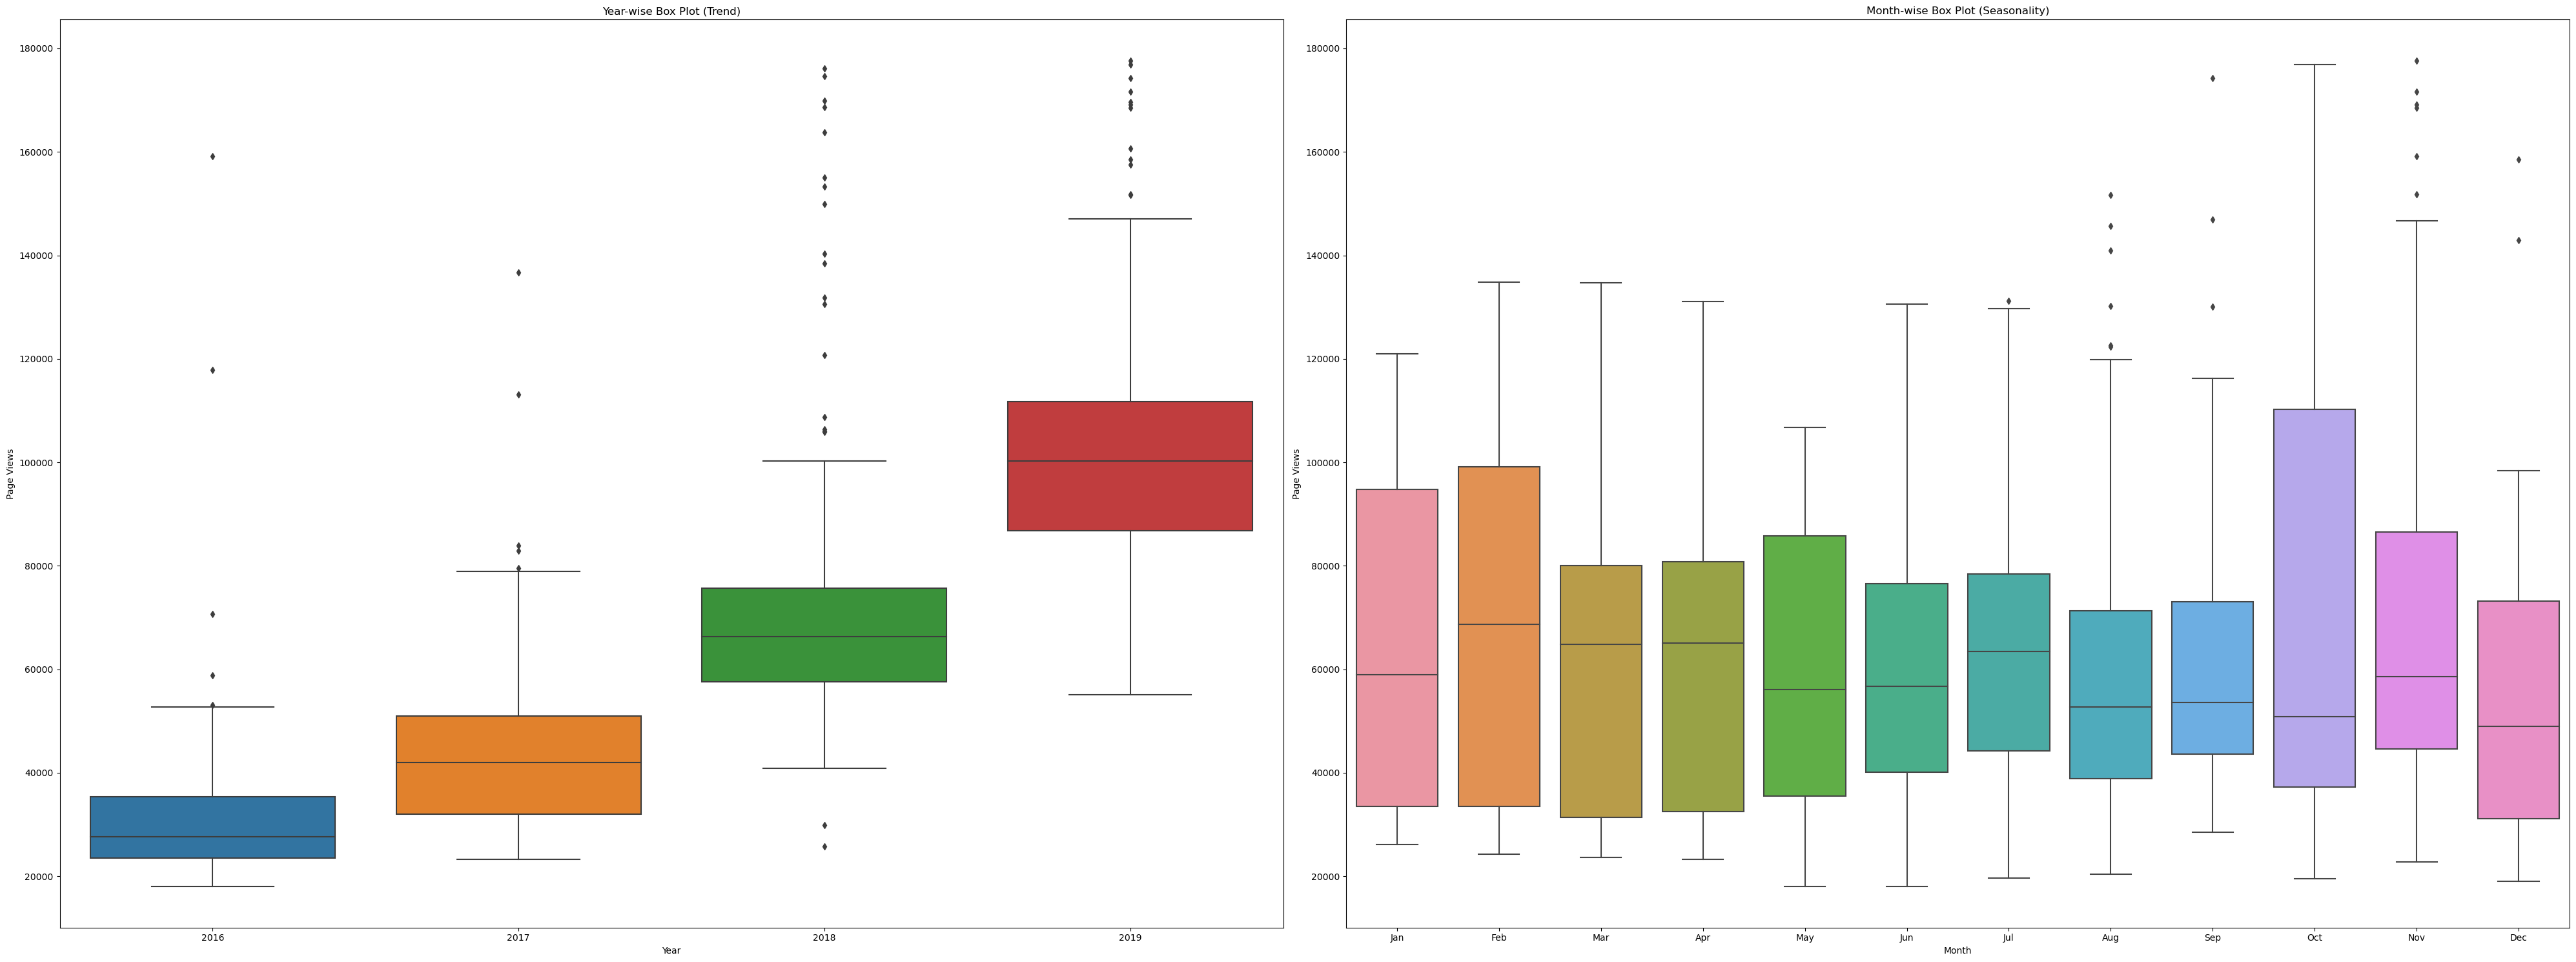

In [19]:
df['Months'] = df.index.strftime('%b')
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Converting the 'Month' column to an ordered categorical data type
df['Months'] = pd.Categorical(df['Months'], categories=month_order, ordered=True)

# Creating a figure and axes for the subplots
fig3, axes = plt.subplots(nrows=1, ncols=2, figsize=(40, 15))

# Plotting box plots by year
sns.boxplot(data=df, x='Year', y='value', ax=axes[0])
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')
axes[0].set_title('Year-wise Box Plot (Trend)')

# Plotting box plots by month
sns.boxplot(data=df, x='Months', y='value', ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')
axes[1].set_title('Month-wise Box Plot (Seasonality)')

# Adjusting the layout and displaying the plots
plt.tight_layout()
plt.show()




In [20]:
len(fig3.get_axes())
ax1 = fig3.axes[0]
ax2 = fig3.axes[1]
actual = []
for label in ax1.get_yaxis().get_majorticklabels():
    actual.append(label.get_text())
actual
len(ax2.lines)/6

12.0